In [1]:
#Goal stimulate X with PDF f(x) = x*exp(-x)

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta, norm 

In [2]:
def f(x):
    #pdf of beta(2,5) 
    return beta.pdf(x,2,5)

In [3]:
def g(x):
    return norm.pdf(x,0.25,0.2)

In [4]:
def AR_method(N):
    rng = np.random.default_rng()
    X = np.array([])
    diff = np.array([])
    for i in range(N):
        while True:
            Y = rng.normal(0.25,0.2)
            U = rng.random()
            
            if U <= f(Y)/(1.5*g(Y)):
                X = np.append(X,Y)
                delta = np.max(np.abs(np.arange(len(np.sort(X))/float(len(np.sort(X))))-beta.cdf(X,2,5)))
                diff = np.append(diff,delta)
                break
    return X,diff

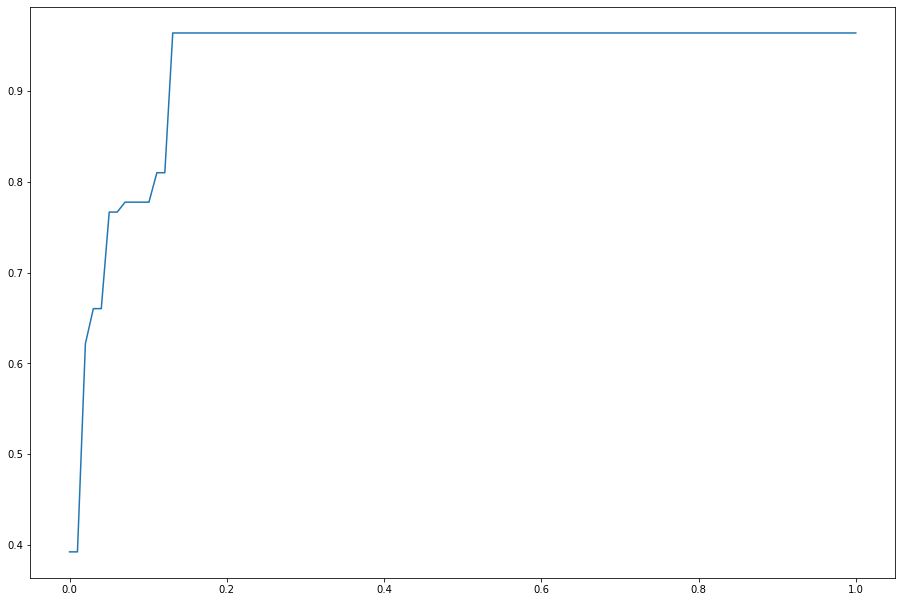

In [5]:
fig, ax = plt.subplots(1, 1) 
fig.set_size_inches(15.5, 10.5)
rng = np.random.default_rng()

#instrumental dist. N(0.25,0.2) and c =1.5
#plt.plot(xx,1.5*g(xx))

X,diff = AR_method(100)

#sample cdf 
X= np.sort(X) 
Y = np.arange(len(X))/float(len(X)) 
#plt.plot(X,Y)
xx = np.linspace(0,1,100)
ax.plot(xx,diff)

plt.show()
